# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      

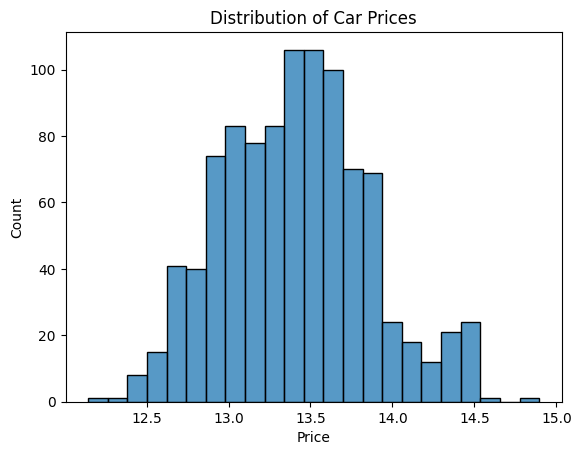

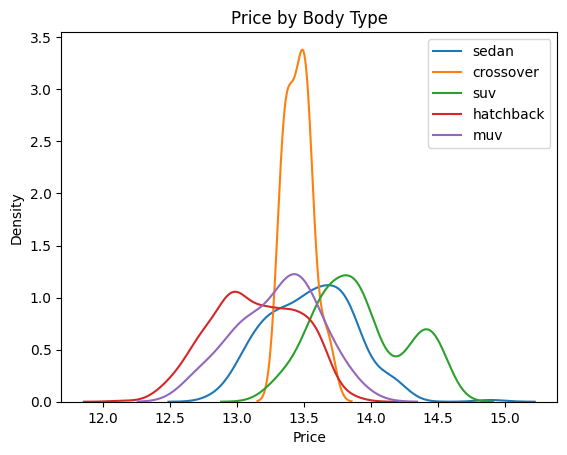

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('cars_hw.csv')
print(df.columns)
print(df.head())

df.dropna(inplace=True)

df['Price'] = np.log1p(df['Price'])
df['Mileage_Run'] = np.log1p(df['Mileage_Run'])

sns.histplot(df["Price"])
plt.title("Distribution of Car Prices")
plt.show()

body = df['Body_Type'].unique()
for b in body:
    sns.kdeplot(df[df['Body_Type'] == b]['Price'], label=b)
plt.title('Price by Body Type')
plt.legend()
plt.show()

In [2]:
numeric_features = ['Make_Year', 'Mileage_Run', 'Seating_Capacity']
categorical_features = ['Color', 'Body_Type', 'Make', 'Fuel_Type', 'Transmission', 'Transmission_Type']

X_cat = pd.get_dummies(df[categorical_features], drop_first=True)
X_num = df[numeric_features]
y = df['Price']

In [3]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [4]:
y_train = train_df['Price']
y_test = test_df['Price']

X_train_num = train_df[numeric_features]
X_test_num = test_df[numeric_features]

model_num = LinearRegression()
model_num.fit(X_train_num, y_train)
pred_train_num = model_num.predict(X_train_num)
pred_test_num = model_num.predict(X_test_num)

def rmse(y_true, y_pred):
  return np.sqrt(np.mean((y_true - y_pred)**2))

def r2(y_true, y_pred):
  tss = np.sum((y_true - np.mean(y_true))**2)
  rss = np.sum((y_true - y_pred)**2)
  return 1 - (rss / tss)

print("Numeric Model")
print("Train RMSE:", rmse(y_train, pred_train_num))
print("Test RMSE:", rmse(y_test, pred_test_num))
print("Train R^2:", r2(y_train, pred_train_num))
print("Test R^2:", r2(y_test, pred_test_num))

X_train_cat = pd.get_dummies(train_df[categorical_features], drop_first=True)
X_test_cat = pd.get_dummies(test_df[categorical_features], drop_first=True)

X_train_cat, X_test_cat = X_train_cat.align(X_test_cat, join='left', axis=1, fill_value=0)

model_cat = LinearRegression()
model_cat.fit(X_train_cat, y_train)
pred_train_cat = model_cat.predict(X_train_cat)
pred_test_cat = model_cat.predict(X_test_cat)

print("\nCategorical Model")
print("Train RMSE:", rmse(y_train, pred_train_cat))
print("Test RMSE:", rmse(y_test, pred_test_cat))
print("Train R^2:", r2(y_train, pred_train_cat))
print("Test R^2:", r2(y_test, pred_test_cat))

X_train_all = pd.concat([X_train_num.reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_test_all = pd.concat([X_test_num.reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)

model_all = LinearRegression()
model_all.fit(X_train_all, y_train)
pred_train_all = model_all.predict(X_train_all)
pred_test_all = model_all.predict(X_test_all)

print("\nJoint Model")
print("Train RMSE:", rmse(y_train, pred_train_all))
print("Test RMSE:", rmse(y_test, pred_test_all))
print("Train R^2:", r2(y_train, pred_train_all))
print("Test R^2:", r2(y_test, pred_test_all))

Numeric Model
Train RMSE: 0.3435315412138305
Test RMSE: 0.3382571859337909
Train R^2: 0.42483642143874734
Test R^2: 0.4000197175768122

Categorical Model
Train RMSE: 0.2590964176565105
Test RMSE: 0.2566550222183944
Train R^2: 0.6728243618059123
Test R^2: 0.6545840013460564

Joint Model
Train RMSE: 0.18640608370719572
Test RMSE: 0.1864770148845031
Train R^2: 0.8306526886089827
Test R^2: 0.8176551374466061


The joint model is the best model.

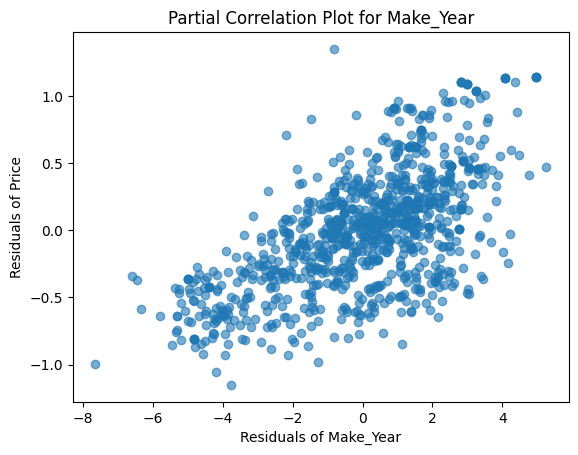

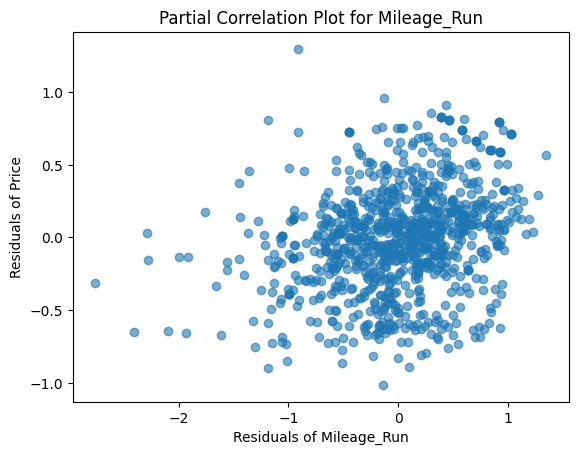

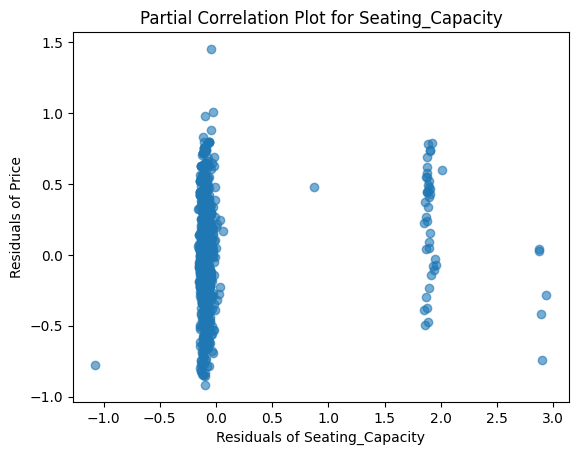

In [6]:
def partial_correlation_plot(df, target, var, controls):
    model_y = LinearRegression().fit(df[controls], target)
    y_resid = target - model_y.predict(df[controls])

    model_x = LinearRegression().fit(df[controls], df[var])
    x_resid = df[var] - model_x.predict(df[controls])

    plt.scatter(x_resid, y_resid, alpha=0.6)
    plt.xlabel(f"Residuals of {var}")
    plt.ylabel(f"Residuals of Price")
    plt.title(f"Partial Correlation Plot for {var}")
    plt.show()

for var in numeric_features:
    controls = [v for v in numeric_features if v != var]
    partial_correlation_plot(df, y, var, controls)


Mileage run and seating capacity has significant non-linearities. The mileage run had a log transformation, which might be why the model is scattered randomly. The seating capacity is a straight line down, which suggests that the model is underfit and missing an important variable.

In [7]:
df = pd.read_csv('cars_hw.csv')

df['log_Mileage_Run'] = np.log(df['Mileage_Run'] + 1)
df['log_Price'] = np.log(df['Price'] + 1)
df['arcsinh_Mileage_Run'] = np.arcsinh(df['Mileage_Run'])
df['Mileage_Year_Interaction'] = df['Mileage_Run'] * df['Make_Year']

X = df[['Make_Year', 'Mileage_Run', 'Seating_Capacity', 'log_Mileage_Run', 'arcsinh_Mileage_Run', 'Mileage_Year_Interaction']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train RMSE:", rmse(y_train, y_train_pred))
print("Test RMSE:", rmse(y_test, y_test_pred))
print("Train R^2:", r2(y_train, y_train_pred))
print("Test R^2:", r2(y_test, y_test_pred))

Train RMSE: 306376.7925512562
Test RMSE: 280766.3476961529
Train R^2: 0.32750868610952466
Test R^2: 0.3127040383656352


The complex model is much worse compared to the simpler one. The complex model has a significantly lower R^2 and significantly higher rmse conpared to the simpler one. The complex model uses many irrelevent features, such as the mileage_year_interaction, which is possibly causing the model to be very overfit. The log and arcsinh transformations also cause scaling issues, which can cause the model to be biased towards larger values and learn the noise.

I have learned that there is a delicate balance in preventing overfitting and underfitting. Selecting too many irrelevent features can cause the model to overfit. Variables that are of very different scales can also cause the model to overfit. Ommitting important features can cause the model to underfit. When selecting models, joint models where you combine categorical and numerical variables result in the best models. Individual categorical and numerical models only cover a portion of the necessary features, so the models are worse.